In [1]:
import os, sys
import copy

import pyfftw

import numpy as np 
from ecpc_utils import run_all, wave_plotter

import gropt2

In [2]:
fname = os.path.abspath('./pseq_basetimes_v0_30_80.mat')
print(f'{fname = }')

all_H0 = np.load('./all_H0_3av.npz')['all_H0_3av']

fname = 'c:\\Users\\mloecher\\Dropbox\\dev\\pcmri_bgmin\\Waveforms\\pseq_basetimes_v0_30_80.mat'


# Axial, First window position
----------------

All Good: True  opt time = 1.2219 ms  n_feval = 2  n_iter = 1


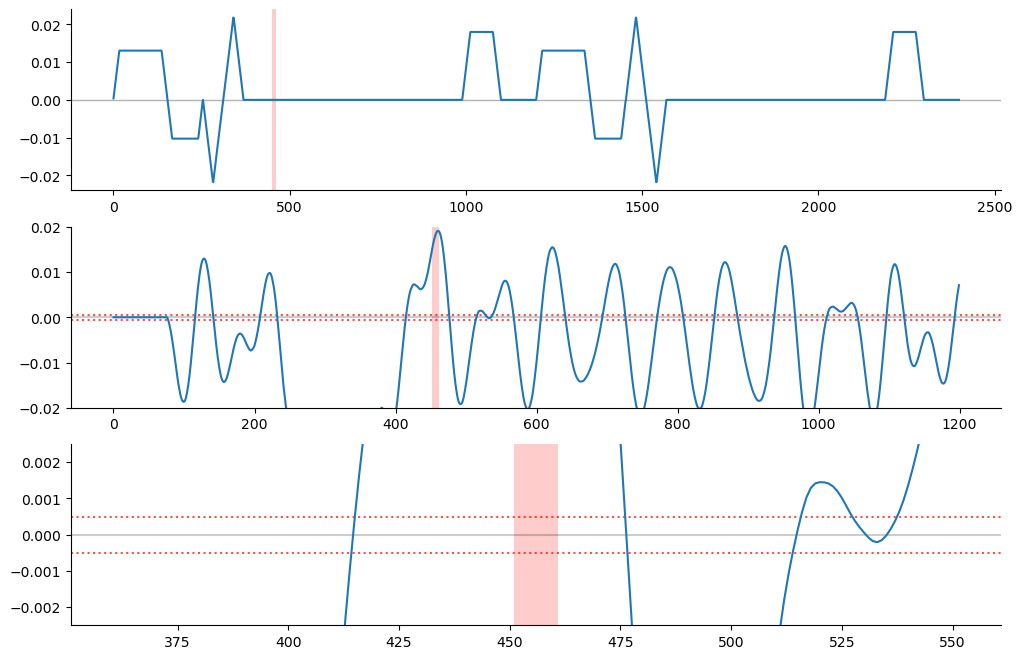

In [3]:
kwargs = {
           "T_bp":1.0e-3,
           "T_spoil": 1.0e-3,
           "tol": .0005,
           "offset_te": 5,
           "dW": 10,
           "do_ecpc": False,
           "do_bipolar":False,
           "do_spoiler":False,
            }


g_out_ref, res_ref, gparams = run_all(fname, all_H0[0], **kwargs)
print(f'All Good: {gparams.final_good>0}  opt time = {gparams.get_opt_time()/1000} ms  n_feval = {int(gparams.total_n_feval)}  n_iter = {int(gparams.total_n_iter)}')

wave_plotter(g_out_ref, res_ref)

# if res_ref['final_good'] > 0:
#     savemat('./waves_2023_0719_2/ref.mat', res_ref)

All Good: True  opt time = 6752.4932 ms  n_feval = 8480  n_iter = 423


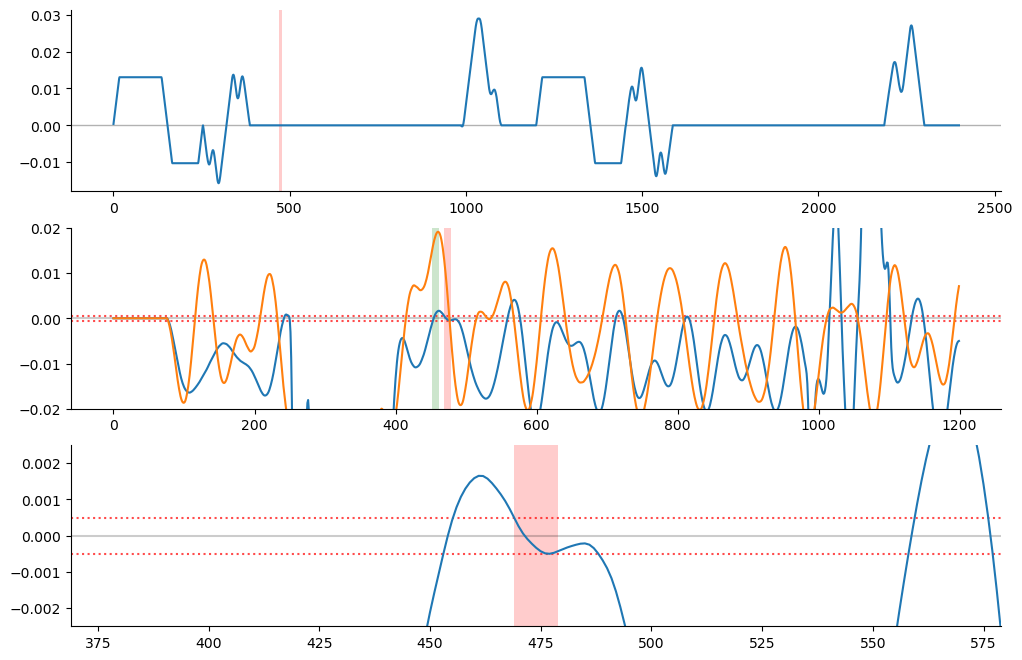

In [4]:
kwargs0 = {
           "T_bp": 1.34e-3,
           "T_spoil": 1.14e-3,
           "do_ecpc": True,
           "tol": .0005,
           "offset_te": 5,
           "dW": 10,
           "do_bipolar":True,
           "do_spoiler":True,
           
            "smooth_weight": 1,
            "kaiser_sigma": 40,
            "cg_niter": 20,
            "cg_rtol": 1e-8,
            "cg_shift": 1e-6,
             }


kwargs = copy.deepcopy(kwargs0)

g_out, res, gparams = run_all(fname, all_H0[0], **kwargs)
print(f'All Good: {gparams.final_good>0}  opt time = {gparams.get_opt_time()/1000} ms  n_feval = {int(gparams.total_n_feval)}  n_iter = {int(gparams.total_n_iter)}')


wave_plotter(g_out, res, g_out_ref, res_ref)

# savename = 'H{:d}_offset{:02d}_bp{:d}_sp{:d}.mat'.format(0,kwargs['offset_te'],kwargs['do_bipolar'],kwargs['do_spoiler'])
# if res['final_good'] > 0:
#     savemat('./waves_2023_0719_2/'+savename, res)

All Good: True  opt time = 2366.2915 ms  n_feval = 2940  n_iter = 146


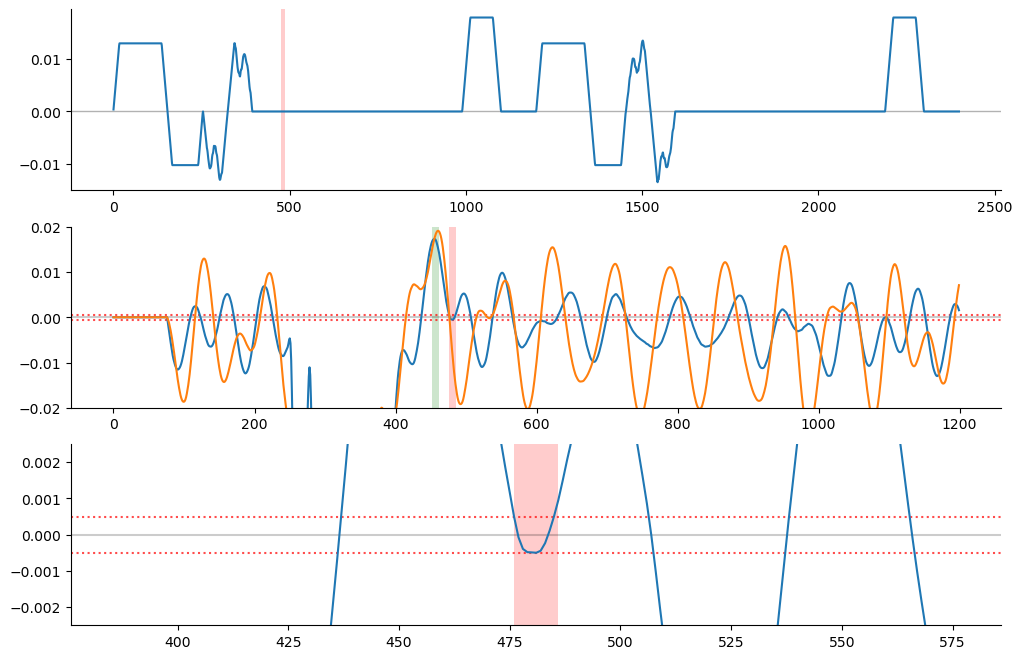

In [5]:
kwargs = copy.deepcopy(kwargs0)
kwargs['T_bp'] = 1.41e-3
kwargs['do_spoiler'] = False

g_out, res, gparams = run_all(fname, all_H0[0], **kwargs)
print(f'All Good: {gparams.final_good>0}  opt time = {gparams.get_opt_time()/1000} ms  n_feval = {int(gparams.total_n_feval)}  n_iter = {int(gparams.total_n_iter)}')

wave_plotter(g_out, res, g_out_ref, res_ref)

# savename = 'H{:d}_offset{:02d}_bp{:d}_sp{:d}.mat'.format(0,kwargs['offset_te'],kwargs['do_bipolar'],kwargs['do_spoiler'])
# if res['final_good'] > 0:
#     savemat('./waves_2023_0719_2/'+savename, res)

All Good: True  opt time = 782.2238000000001 ms  n_feval = 2219  n_iter = 111


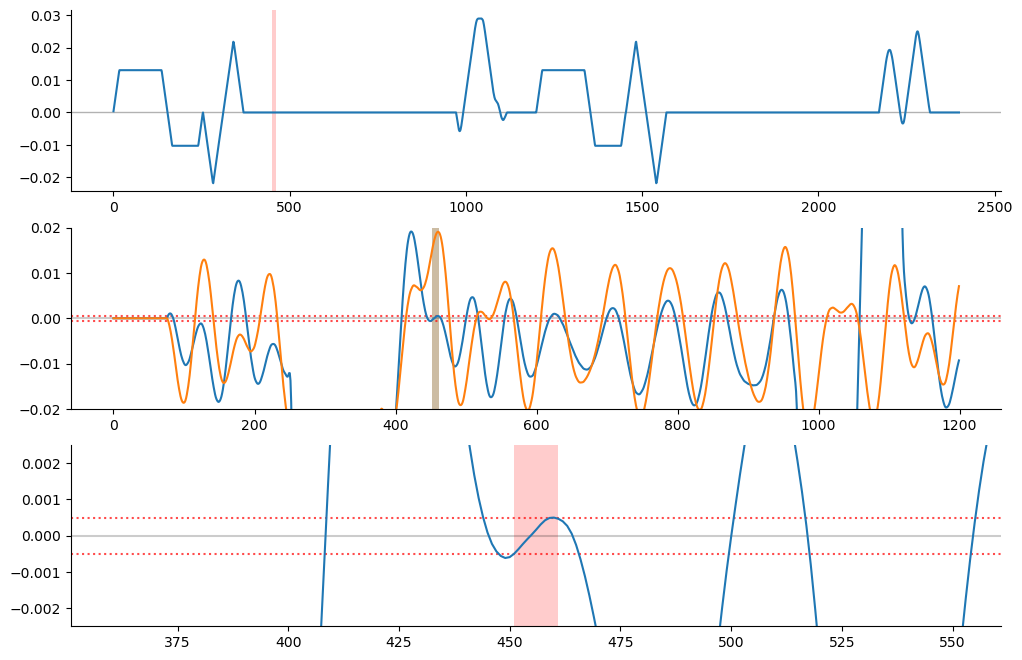

In [7]:
kwargs = copy.deepcopy(kwargs0)
kwargs['T_spoil'] = 1.45e-3
kwargs['do_bipolar'] = False

g_out, res, gparams = run_all(fname, all_H0[0], **kwargs)
print(f'All Good: {gparams.final_good>0}  opt time = {gparams.get_opt_time()/1000} ms  n_feval = {int(gparams.total_n_feval)}  n_iter = {int(gparams.total_n_iter)}')

wave_plotter(g_out, res, g_out_ref, res_ref)

# savename = 'H{:d}_offset{:02d}_bp{:d}_sp{:d}.mat'.format(0,kwargs['offset_te'],kwargs['do_bipolar'],kwargs['do_spoiler'])
# if res['final_good'] > 0:
#     savemat('./waves_2023_0719_2/'+savename, res)